#### Set up matplotlib to be inline for jupyter and import everything

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import csv
import find_projections.search_projections as search_projections
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from random import sample
from math import floor

#### Define visualization and leaning model functions

In [3]:
%run viz.py
%run mod.py
%run utils.py
%run load_d3m_data.py

#### Define global parameters

In [4]:
plot_limit = 10

#### Load Dataset and get rid of missing values for scikit-learn compatibility

In [5]:
(protein_train_data,protein_train_label,protein_test_data,protein_train_d3m_index,protein_test_d3m_index,protein_label_dict,protein_headers)=load_protein_dataset()
(baseball_train_data,baseball_train_label,baseball_test_data,baseball_train_d3m_index,baseball_test_d3m_index,baseball_position_dict,baseball_label_dict,baseball_headers)=load_baseball_dataset()
(auto_train_data,auto_train_label,auto_test_data,auto_train_d3m_index,auto_test_d3m_index,auto_headers)=load_auto_dataset()
(radon_train_data,radon_train_label,radon_test_data,radon_train_d3m_index,radon_test_d3m_index,radon_headers)=load_radon_dataset()
(spectro_train_data,spectro_train_label,spectro_test_data,spectro_train_d3m_index,spectro_test_d3m_index,spectro_headers)=load_spectrometer_dataset()
(thyroid_train_data,thyroid_train_label,thyroid_test_data,thyroid_train_d3m_index,thyroid_test_d3m_index,thyroid_headers,thyroid_referral_dict,thyroid_sex_dict,thyroid_truth_dict,thyroid_label_dict) = load_thyroid_dataset()
(imseg_train_data,imseg_train_label,imseg_test_data,imseg_test_label,imseg_train_d3m_index,imseg_test_d3m_index,imseg_headers,imseg_label_dict)=load_imseg_dataset()

# Projections for Classification Learning Tasks
### Following experiments find and visualize boxes in native feature and label space.
##### Meta-parameters (purity, support, binsize, num_threads) to be determined by TA2/TA3 performers

## Baseball Dataset - What makes inductees different than other players?
#### Class 0: Not admitted, Class 1: Admitted via Standard Vote, Class 2: Admitted posthumously via Veterans Board.  The most obvious task that seems interesting would be to distinguish between the players inducted and those who are not a part of the Hall of Fame

CPU times: user 11.7 s, sys: 12.8 ms, total: 11.7 s
Wall time: 1.29 s
602


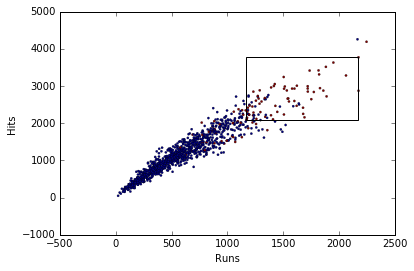

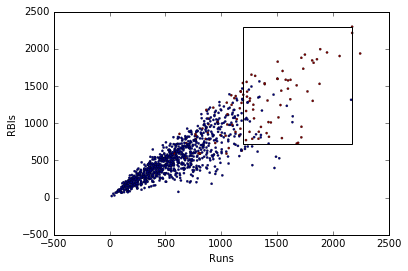

In [9]:
#Create search object and set parameters defining the types of boxes we want to see
search_object = search_projections.Search(purity=.7,support=80,binsize=8,num_threads=60)
search_object.set_training_data(baseball_train_data,baseball_train_label)

#Execute the search
%time fmap=search_object.search_projections()

#Visualize the results
num = fmap.get_num_projections()
print num
num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    if pr.get_class() > 0: #ONLY INTERESTED IN INDUCTEE BOXES (underrepresented class) FOR NOW
        show_projection(pr,baseball_train_data,baseball_train_label,baseball_headers)
        # If we want to know the indices of points inside the box (used to build baseball spreadsheet)
        #(ii,li)=points_inside_box(pr,baseball_train_data,baseball_train_label,baseball_train_d3m_index)
        #temp=np.hstack([np.asarray([[t] for t in ii]),np.asarray([[r] for r in li])])
        #print temp

### With 0,1,2 label scheme
#### p=.9, s=25, b=8 yields 1 box for class 'hall of fame' in 'Triples' vs. 'RBIs'.  Red samples denote players under consideration for hall of fame.  This projection shows a 2 candidates which easily fall in the same box as players already admitted to the hall of fame.
#### p=.85, s=25, b=8 yields boxes for class 'hall of fame' over 'RBIs' 'Games Played' and 'Slugging Pct'

### With 0,1,1 label scheme
#### p=.65, s=90, b=8 yields a few boxes which distinguish between hall of famers and regular players.  In each of these boxes above, 'Runs' is captured.  It seems like there is almost univariate behavior on this feature which is indicative of induction into the hall of fame (both by vote and veterans board).  The low purity requirement allows us to find boxes which may not be pure, but do capture a large majority of inductees (~60/99).  These boxes make sense...they collectively imply that many 'Runs', 'RBIs', 'Hits', and a high 'Fielding average' are the most universal indicators of being inducted into the hall of fame
#### If we relax the support criterion to something like s=~25 and up the purity requirement p=~.9, we start to find boxes that pick out the features 'Bats', 'Games Played', 'Number of Seasons'.  This makes sense as well...players that have the longest careers have more opportunities to improve their stats.   While these may also be good indicators for the classification task at hand, they are not as generalizable across all inductees

## Protein Dataset - Do classes exhibit separable low-dimensional structure?
#### 8 classes correspond to 3 binary features, injection type (saline/memantine), behavioral training (shock-context/context-shock), and genetic markers (control/trisomic)

CPU times: user 2min 47s, sys: 51.3 ms, total: 2min 47s
Wall time: 6.2 s
1


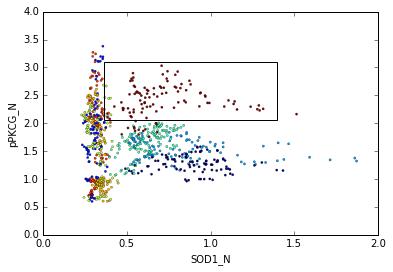

In [25]:
#Create search object and set parameters defining the types of boxes we want to see
search_object = search_projections.Search(purity=.9,support=100,binsize=16,num_threads=60)
search_object.set_training_data(protein_train_data,protein_train_label)

#Execute the search
%time fmap=search_object.search_projections()#.find_easy_explain_data()


num = fmap.get_num_projections()
print num

#If there are a lot of plots, show a few random ones
if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    show_projection(pr,protein_train_data,protein_train_label,protein_headers)



## Spectrometer dataset - do classes exhibit separable, low-dimesional structure?
#### 99 possible classes, tens digit defines a super class while ones digit defines subset characteristics.  This task is reduced to a 10 class problem (00-09)=0, (10-19)=1, etc.

CPU times: user 23.7 s, sys: 34.4 ms, total: 23.7 s
Wall time: 562 ms
9866


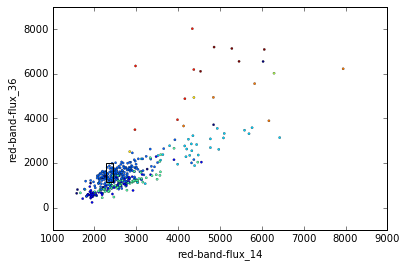

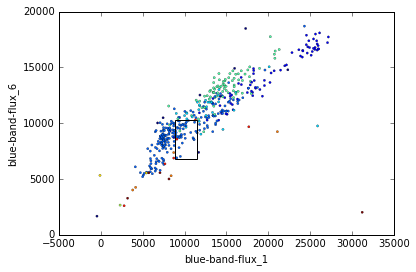

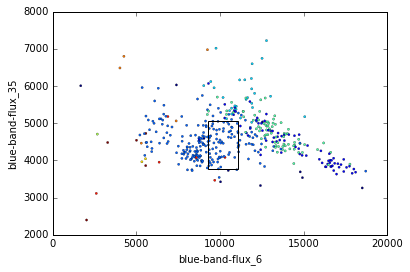

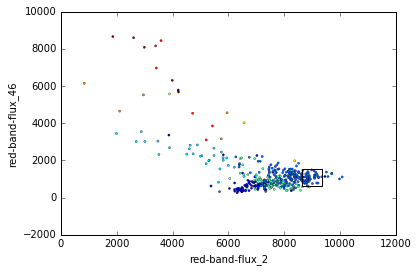

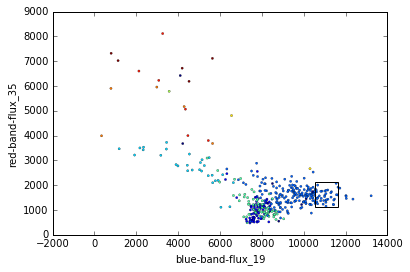

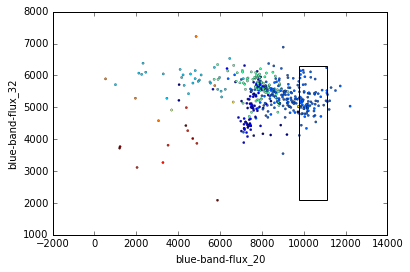

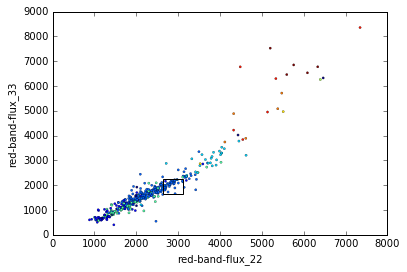

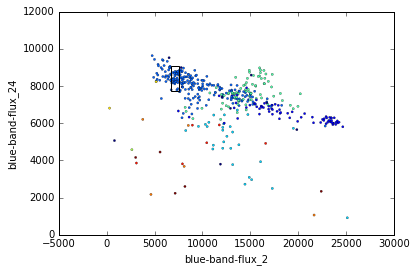

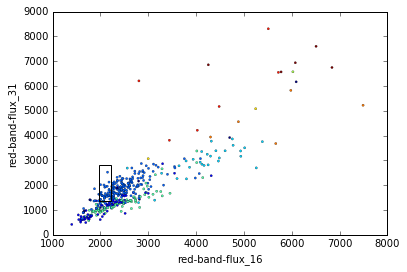

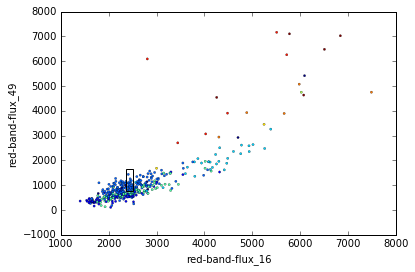

In [27]:
search_object = search_projections.Search(purity=.9,support=25,binsize=20,num_threads=60)
search_object.set_training_data(spectro_train_data,spectro_train_label)

%time fmap=search_object.search_projections()

num = fmap.get_num_projections()
print num

#If there are a lot of plots, show a few random ones
if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    show_projection(pr,spectro_train_data,spectro_train_label,spectro_headers)

## Thyroid dataset - What makes cancer patients different than healthy individuals?

CPU times: user 1.2 s, sys: 11.1 ms, total: 1.21 s
Wall time: 386 ms
897


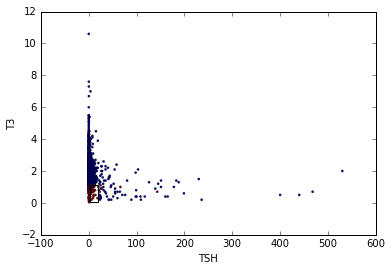

In [40]:
search_object = search_projections.Search(purity=.85,support=50,binsize=8,num_threads=60)
search_object.set_training_data(thyroid_train_data,thyroid_train_label)

%time fmap=search_object.search_projections()

num = fmap.get_num_projections()
print num

if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    if(pr.get_class() ==1): #interested in sick patterns only
        show_projection(pr,thyroid_train_data,thyroid_train_label,thyroid_headers)

# Projections for Regression Learning Tasks
##### Meta-parameters (purity, support, binsize, num_threads,mode) to be determined by TA2/TA3 performers

## Protein Dataset - Remove classification label and use feature 28 as numeric target.  Find low variance boxes

CPU times: user 4min 29s, sys: 138 ms, total: 4min 29s
Wall time: 7.46 s


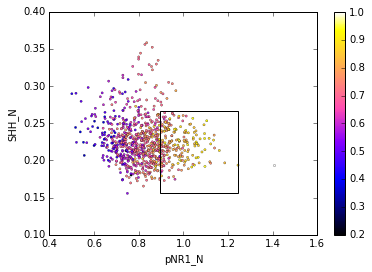

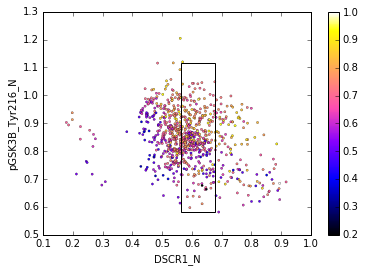

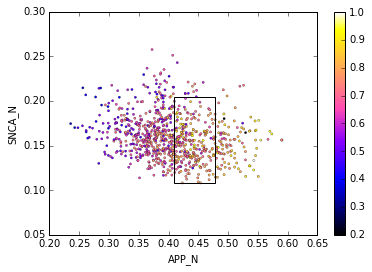

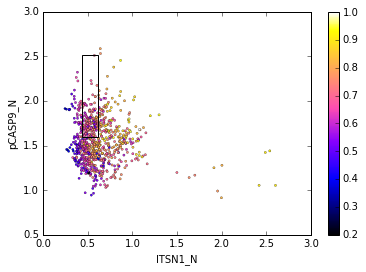

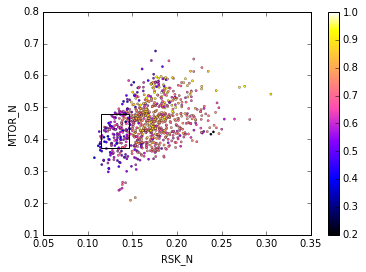

In [379]:
#Swapping native labels for real-valued target determined by single feature of dataset
target=28

#Manipulate Dataset
l=protein_train_data[:,target]
d=protein_train_data[:,[i for i in xrange(protein_train_data.shape[1]) if i!=target]]
npheaders = np.array(protein_headers)
h=npheaders[[i for i in xrange(protein_train_data.shape[1]) if i!=target]]

# Create a regressor search object
search_object_r = search_projections.Search(binsize=8,support=100,num_threads=60,mode=0)
p= search_object_r.get_params()
p=p._replace(is_classifier=False)
search_object_r.set_params(p)
search_object_r.set_training_data(d,l)

%time fmap_r=search_object_r.search_projections()

num = fmap_r.get_num_projections()
#If there are a lot of plots, show a few random ones
if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)

for i in num:
    pr_r = fmap_r.get_projection(i)
    show_projection_rlabel(pr_r,d,l,h)

## Auto-mpg dataset - What characteristics discriminate between high/low mileage cars

CPU times: user 660 ms, sys: 11.1 ms, total: 671 ms
Wall time: 366 ms
28


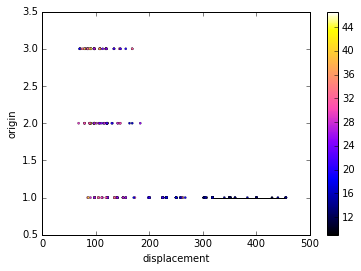

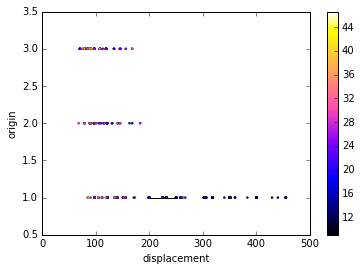

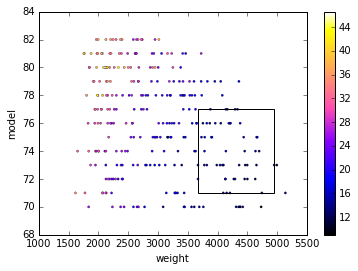

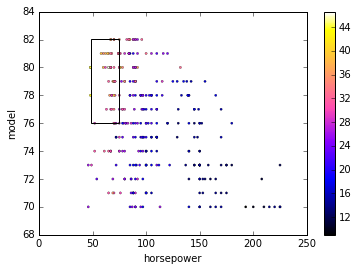

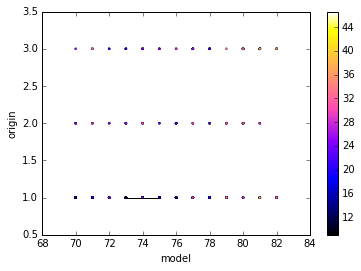

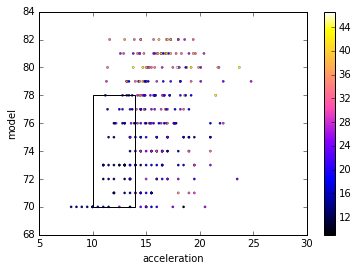

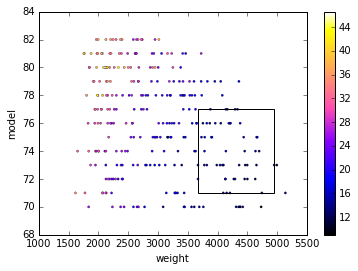

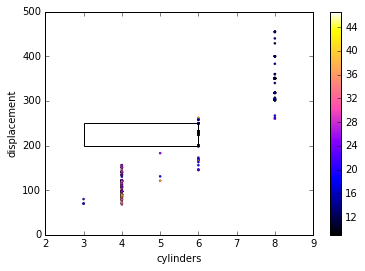

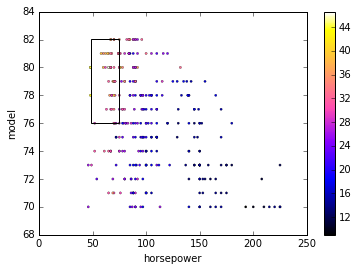

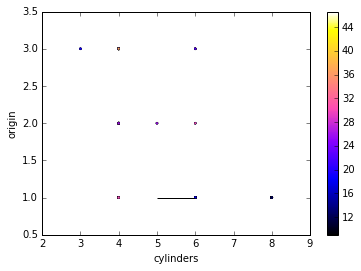

In [61]:
search_object_r = search_projections.Search(binsize=1,support=50,num_threads=60,mode=0)


p= search_object_r.get_params()
p=p._replace(is_classifier=False)
search_object_r.set_params(p)
search_object_r.set_training_data(auto_train_data,auto_train_label)



%time fmap_r=search_object_r.search_projections()
num = fmap_r.get_num_projections()
print num

if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)
    
for i in num:
    pr_r = fmap_r.get_projection(i)
    show_projection_rlabel(pr_r,auto_train_data,auto_train_label,auto_headers)

# Explaining Model Performance

## Imseg dataset - Where in the native feature space does my classification model perform poorly?
#### Define a learning task and train a support vector machine.  Run find_projection regression mode=2 with the prediction probabilities output from the classification model.  We are looking to see if the least confident predictions this model makes congregate in any low-dimensional subspace of the native feature space

0.889523809524
CPU times: user 41.1 ms, sys: 10.7 ms, total: 51.8 ms
Wall time: 9.29 ms


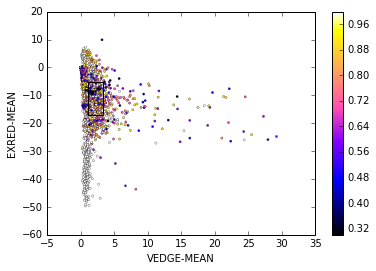

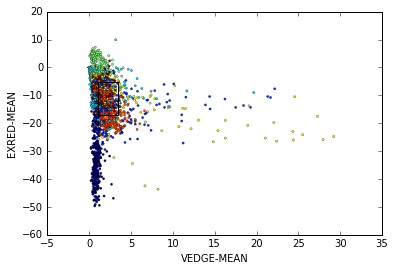

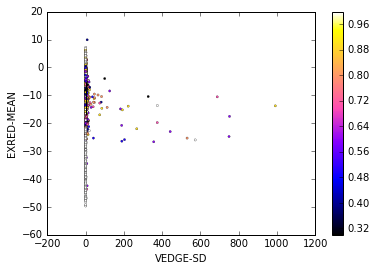

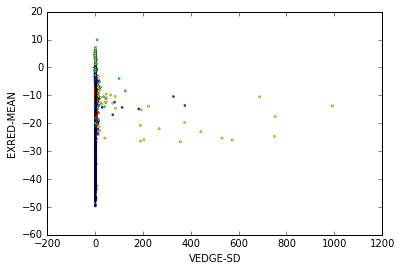

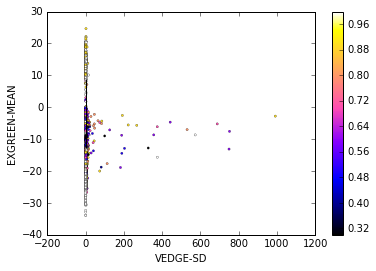

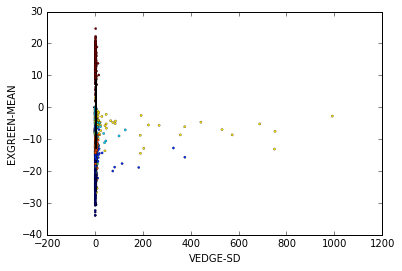

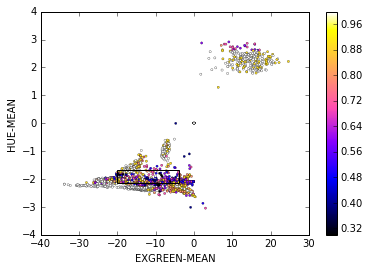

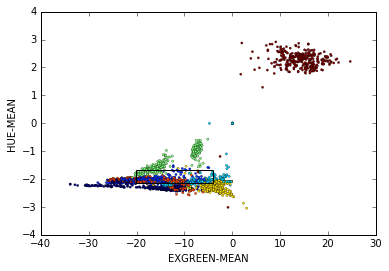

In [29]:
# First 4 features are not very informative...output looks better in other subspaces
train_data = [r[5:] for r in imseg_train_data]#imseg_train_data
test_data = [r[5:] for r in imseg_test_data]#imseg_test_data
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
train_labels = imseg_train_label#imseg_train_label
test_labels = imseg_test_label#imseg_test_label
headers = imseg_headers[5:]

#Train the model and find which samples do not have confident predictions
m = RandomForestClassifier()
m = m.fit(train_data,train_labels)
mpred = m.predict(test_data)
mprob = m.predict_proba(test_data)

print metrics.accuracy_score(test_labels,mpred)

#Set this as a new learning task
confidence_label=[max(i) for i in mprob]

#Look for low mean, low variance boxes...Do our least confident predictions congregate in the native feature space?
so = search_projections.Search(support=500,binsize=300,num_threads=60,mode=2)
p= so.get_params()
p=p._replace(is_classifier=False)
so.set_params(p)
so.set_training_data(test_data,confidence_label)

%time fmap=so.search_projections()

#Only plot a few random projections if many return
num = fmap.get_num_projections()
if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)
    
for i in num:
    pr = fmap.get_projection(i)
    show_projection_rlabel(pr,test_data,confidence_label,headers) #virtual label space
    show_projection(pr,test_data,test_labels,headers) #native label space


# Model errors - Do errors cluster in subspace of feature space?
## Baseball Dataset

CPU times: user 2.38 s, sys: 14.1 ms, total: 2.39 s
Wall time: 384 ms
738


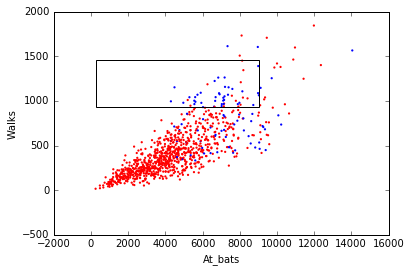

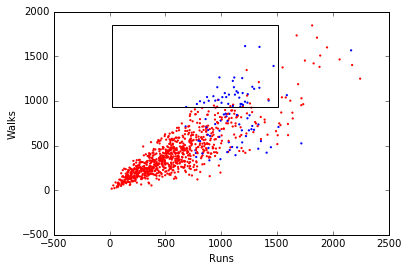

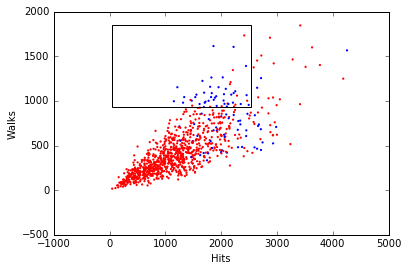

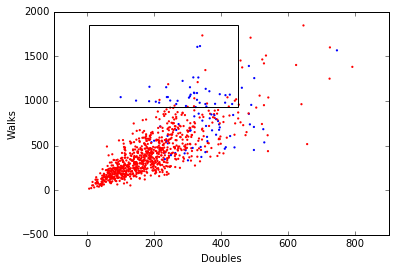

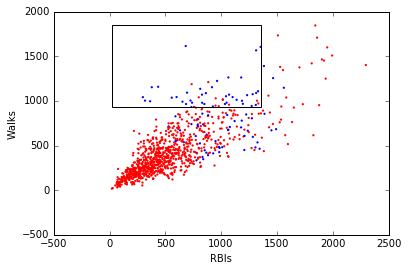

In [118]:
#This block makes a random split...you might need to run it a few times until a particularly bad model is trained
#First define a valid learning task
d = baseball_train_data
l = baseball_train_label
headers = baseball_headers 
ri = np.asarray([i for i in xrange(len(l))])

#Split into train and test data
shuffle_ids=sample(ri,len(l))
train_prop=.10
train_ids = shuffle_ids[0:int(len(ri)*train_prop)]
test_ids = shuffle_ids[int(len(ri)*train_prop):]

train_data = d[train_ids]
train_labels = l[train_ids]
test_data = d[test_ids]
test_labels=l[test_ids]

train_labels = np.asarray([i for i in train_labels])
test_labels = np.asarray([i for i in test_labels])

#Train the model and find which samples do not have confident predictions
#Make this model poor so the deficiencies are more apparent
model = RandomForestClassifier(n_estimators=1,max_depth=5)
model = model.fit(train_data,train_labels)
model_predictions = model.predict(test_data)
#model_probability = model.predict_proba(train_data)
model_errors = [1.0 if model_predictions[i]!=test_labels[i] else 0.0 for i in xrange(len(model_predictions)) ]

#Set this as a new learning task
l=np.asarray(model_errors)#np.asarray(confidence_mask)
d=test_data

search_object = search_projections.Search(purity=.7,support=50,binsize=16,num_threads=60)
search_object.set_training_data(d,l)
%time fmap=search_object.search_projections()

num = fmap.get_num_projections()
print num
#if num>plot_limit: num=np.random.randint(num, size=plot_limit)
#else: num=xrange(num)
num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    if pr.get_class()==1:
        show_projection_binary(pr,test_data,model_errors,headers)
        #show_projection(pr,test_data,test_labels,headers)



# Gaps in Training vs Testing Data
## Imseg data - 210 train samples vs random 210 test samples

CPU times: user 1.55 s, sys: 15.1 ms, total: 1.56 s
Wall time: 264 ms


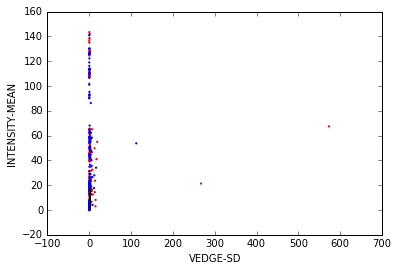

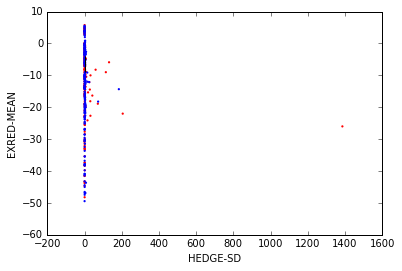

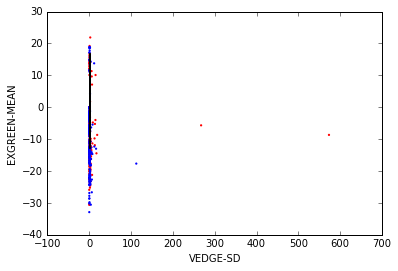

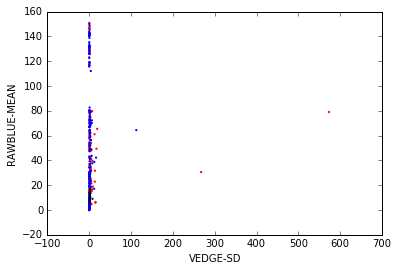

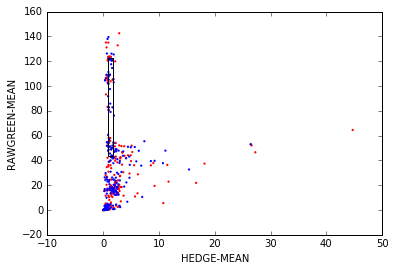

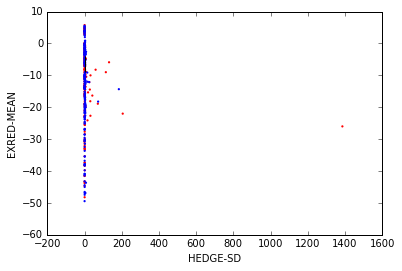

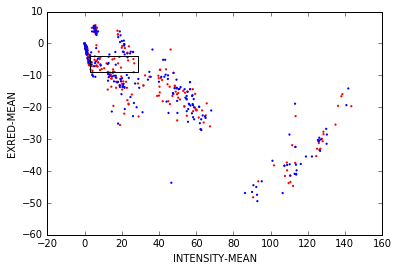

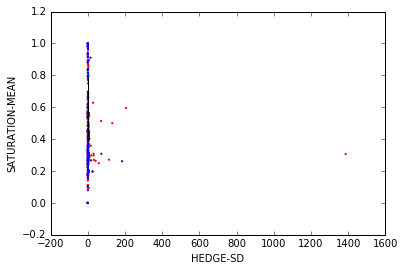

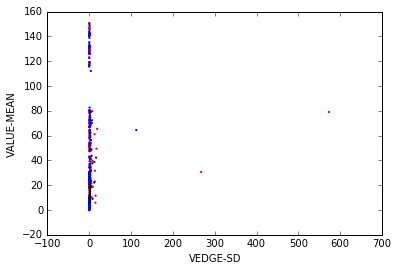

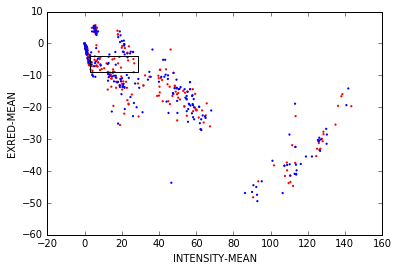

In [143]:
#Split into train and test data
shuffle_ids=sample(imseg_test_d3m_index,len(imseg_test_d3m_index))
test_ids = shuffle_ids[0:imseg_train_data.shape[0]]

train_data = imseg_train_data#d[train_ids]
#train_labels = [0]*shape(train_data)[0]
test_data = imseg_test_data[test_ids]
#test_labels=[1]*shape(train_data)[1]
headers = imseg_headers
l=np.asarray([0.0]*train_data.shape[0]+[1.0]*test_data.shape[0])

#train_labels = np.asarray([i for i in train_labels])
#test_labels = np.asarray([i for i in test_labels])

#Set this as a new learning task
#l=np.asarray(model_errors)#np.asarray(confidence_mask)
d=np.vstack((train_data,test_data))

search_object = search_projections.Search(purity=.75,support=50,binsize=8,num_threads=60)
search_object.set_training_data(d,l)
%time fmap=search_object.search_projections()
num = fmap.get_num_projections()
if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    show_projection_binary(pr,d,l,headers)

# Gaps in Training vs Testing Data (When there is a dataset error)
## Imseg data - 210 train samples vs first 210 test samples
#### Box method can identify when i.i.d. assumption does not hold in between training and testing data

CPU times: user 37.7 ms, sys: 10.7 ms, total: 48.4 ms
Wall time: 12.2 ms


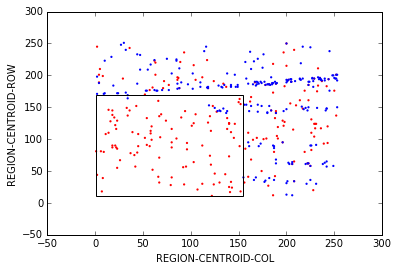

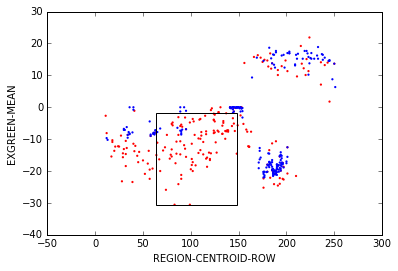

In [158]:
train_data = imseg_train_data
test_data = imseg_test_data[:210]
headers = imseg_headers

l=np.asarray([0.0]*train_data.shape[0]+[1.0]*test_data.shape[0])
d=np.vstack((train_data,test_data))

search_object = search_projections.Search(purity=.9,support=100,binsize=32,num_threads=60)
search_object.set_training_data(d,l)
%time fmap=search_object.search_projections()
num = fmap.get_num_projections()

if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    show_projection_binary(pr,d,l,headers)

# Decision Lists with Primitives

## Image Segmentation dataset (not-seed) - Build an interpretable, decision list model by finding a box and then removing that data from consideration before finding the next best box.  

CPU times: user 2.33 s, sys: 106 ms, total: 2.44 s
Wall time: 357 ms


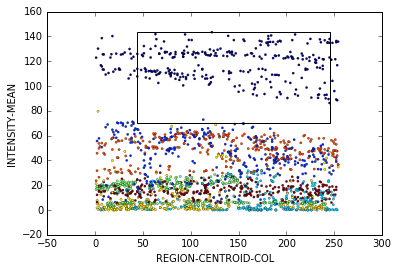

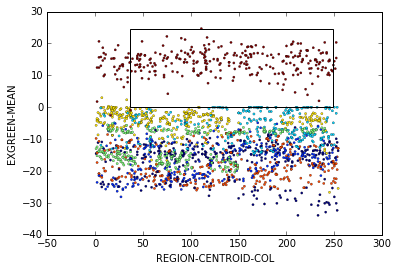

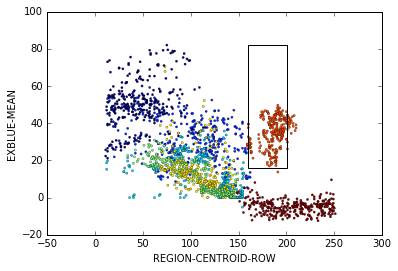

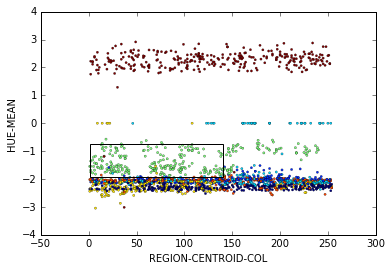

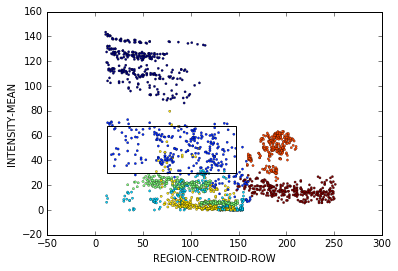

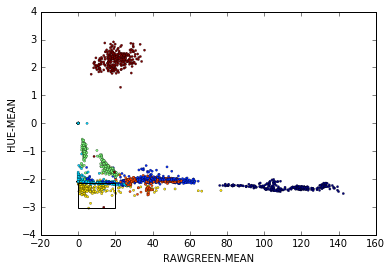

In [183]:
train_data = imseg_test_data #dataset has many more samples in testing block, let's use this for larger set example
train_label = imseg_test_label

search_object = search_projections.Search(purity=.85,support=200,binsize=64,num_threads=60)
search_object.set_training_data(train_data,train_label)
%time fmap=search_object.find_easy_explain_data()
num = fmap.get_num_projections()

if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)
    
for i in num:
    pr = fmap.get_projection(i)
    show_projection(pr,train_data,train_label,headers)

# Staged model with explainable decision list and more powerful back-end

CPU times: user 2min 3s, sys: 141 ms, total: 2min 3s
Wall time: 18.4 s
5
class: 0 att1: 0 att2: 9 xmin: 1.0 xmax: 252.0 ymin: 89.44444 ymax: 143.44444
class: 6 att1: 3 att2: 18 xmin: 0.0 xmax: 0.33333334 ymin: 1.2870604 ymax: 2.9124804
class: 3 att1: 0 att2: 18 xmin: 1.0 xmax: 140.0 ymin: -1.8451205 ymax: -0.7616482
class: 5 att1: 1 att2: 16 xmin: 155.0 xmax: 210.0 ymin: 32.22222 ymax: 80.22222
class: 1 att1: 1 att2: 10 xmin: 12.0 xmax: 160.0 ymin: 24.88889 ymax: 62.444443
Linear SVM accuracy: 0.971428571429
Vanilla Staged Box+SVM Accuracy: 0.952380952381
Witheld Staged Box+SVM Accuracy: 0.952380952381
Easy predictions made: 142 / 210


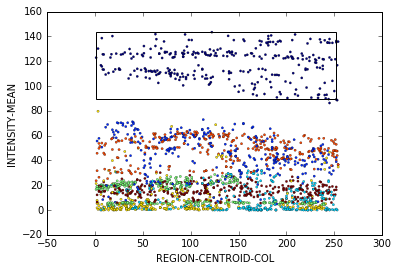

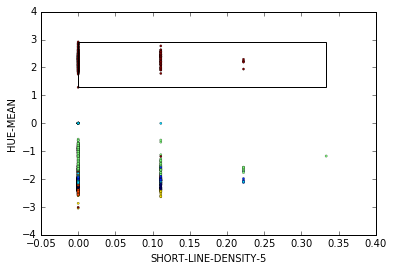

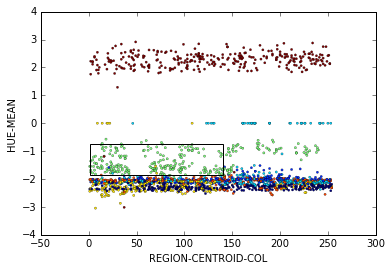

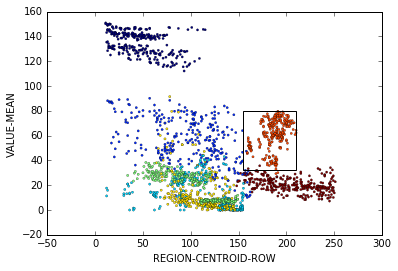

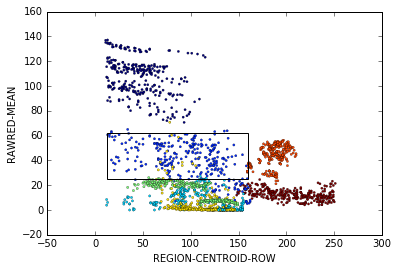

In [186]:
train_data = imseg_test_data
test_data = imseg_train_data
train_labels = imseg_test_label
test_labels = imseg_train_label

headers = imseg_headers
search_object = search_projections.Search(purity=.9,support=200,binsize=15,num_threads=60)
search_object.set_training_data(train_data,train_labels)
%time fmap=search_object.find_easy_explain_data()
num = fmap.get_num_projections()
projection_list = [[]]*num
print num
if num>plot_limit: num=np.random.randint(num, size=plot_limit)
else: num=xrange(num)
    
for i in num:
    pr = fmap.get_projection(i)
    projection_list[i]=pr
    show_projection(pr,train_data,train_labels,imseg_headers)

dlist = make_dlist(projection_list)
print_dlist(dlist)

dpred = dlist_make_predictions(dlist,test_data)
captured = dlist_make_predictions(dlist,train_data)
m = svm.SVC(probability=True,kernel='linear')
m = m.fit(train_data,train_labels)
mpred = m.predict(test_data)

print 'Linear SVM accuracy:',metrics.accuracy_score(test_labels,mpred)

spred = [[]]*len(mpred)

for i in xrange(len(dpred)):
    if(dpred[i]!=-1):
        spred[i]=dpred[i]
    else:
        spred[i]=mpred[i]

print 'Vanilla Staged Box+SVM Accuracy:',metrics.accuracy_score(test_labels,spred)


m2 = svm.SVC(probability=True,kernel='linear')
train_data2 = np.asarray([train_data[i] for i in xrange(len(captured)) if captured[i]==-1 ])
train_labels2 = np.asarray([train_labels[i] for i in xrange(len(captured)) if captured[i]==-1 ])

m2 = m2.fit(train_data2,train_labels2)
m2pred = m2.predict(test_data)

count=0
s2pred=[[]]*len(dpred)
for i in xrange(len(dpred)):
    if dpred[i]!=-1:
        count+=1
        s2pred[i]=dpred[i]
    else:
        s2pred[i]=m2pred[i]

#print m2pred
#print s2pred

#for i in xrange(len(dpred)):
#    print dpred[i],mpred[i],m2pred[i],test_labels[i]
print 'Witheld Staged Box+SVM Accuracy:',metrics.accuracy_score(test_labels,s2pred)
print 'Easy predictions made:',count,'/',len(dpred)
#print 'm2',metrics.accuracy_score(test_labels,m2pred)
#for i in xrange(num):
#    pr = fmap.get_projection(i)
#    #if pr.get_class()==1:
#    show_projection(pr,test_data,test_labels,headers)

CPU times: user 65.2 ms, sys: 43.9 ms, total: 109 ms
Wall time: 41.5 ms
2
class: 0 att1: 2 att2: 19 xmin: 0.0 xmax: 1.0 ymin: 1.2 ymax: 7.6
class: 1 att1: 19 att2: 21 xmin: 0.05 xmax: 0.8 ymin: 78.0 ymax: 124.0
Linear SVM accuracy: 0.960076045627
Vanilla Staged Box+SVM Accuracy: 0.960076045627
Easy predictions made: 491 / 526


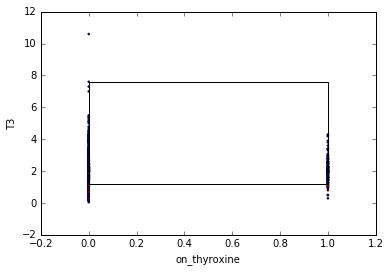

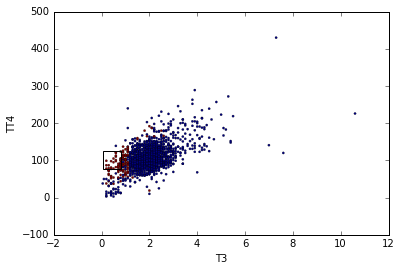

In [218]:
#This block makes a random split...you might need to run it a few times until a particularly bad model is trained
#First define a valid learning task
d = thyroid_train_data
l = thyroid_train_label
headers = thyroid_headers 
ri = np.asarray([i for i in xrange(len(l))])

#Split into train and test data
shuffle_ids=sample(ri,len(l))
train_prop=.75
train_ids = shuffle_ids[0:int(len(ri)*train_prop)]
test_ids = shuffle_ids[int(len(ri)*train_prop):]

train_data = d[train_ids]
train_labels = l[train_ids]
test_data = d[test_ids]
test_labels=l[test_ids]

train_labels = np.asarray([i for i in train_labels])
test_labels = np.asarray([i for i in test_labels])

search_object = search_projections.Search(purity=.95,support=20,binsize=75,num_threads=60)
search_object.set_training_data(train_data,train_labels)

%time fmap=search_object.find_easy_explain_data()

num = fmap.get_num_projections()
projection_list = [[]]*num
print num
num=xrange(num)

for i in num:
    pr = fmap.get_projection(i)
    projection_list[i]=pr
    show_projection(pr,train_data,train_labels,headers)

dlist = make_dlist(projection_list)
print_dlist(dlist)

dpred = dlist_make_predictions(dlist,test_data)
captured = dlist_make_predictions(dlist,train_data)

m = svm.SVC(probability=True,kernel='linear')
m = m.fit(train_data,train_labels)
mpred = m.predict(test_data)

print 'Linear SVM accuracy:',metrics.accuracy_score(test_labels,mpred)

spred = [[]]*len(mpred)
for i in xrange(len(dpred)):
    if(dpred[i]!=-1):
        spred[i]=dpred[i]
    else:
        spred[i]=mpred[i]

count = sum([1 for i in xrange(len(dpred)) if dpred[i]>-1])
print 'Vanilla Staged Box+SVM Accuracy:',metrics.accuracy_score(test_labels,spred)
print 'Easy predictions made:',count,'/',len(dpred)

In [50]:
# Other potential ideas: Onion Peeling, boxes as neurons, 

# Boxes in High Dimensional PCA

# Explaining Contradictory Examples